# Анализ бизнес-показателей приложения Procrastinate Pro+

Развлекательного приложения Procrastinate Pro+ последние несколько месяцев терпит убытки, несмотря на огромные вложения в рекламу. Задача - на основе данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года разобраться в причинах и помочь компании выйти в плюс.

***Цель работы:***
- Выделить причины неэффективности привлечения пользователей;
- Сформулировать рекомендации для отдела маркетинга.

### Загрузите данные и подготовьте их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку.

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

#### Загрузка данных

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

#### Вывод фрагментов и информации датасетов

##### Данные посетителей
По данным посетителей можно заметить, что:
- не найдено явных пропусков в столбцах;
- необходимо переименовать все столбцы, заменяя пробелы нижним подчеркиванием и переводя символы в нижний регистр;
- необходимо заменить типы столбцов `Session Start` и `Session End` на `datetime64[ns]`.

In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


##### Данные заказов
По данным заказов можно заметить, что:
- не найдено явных пропусков в столбцах;
- необходимо переименовать все столбцы, заменяя пробелы нижним подчеркиванием и переводя символы в нижний регистр;
- необходимо заменить типа столбца `Event Dt` на `datetime64[ns]`.

In [5]:
orders.sample(5)

,User Id,Event Dt,Revenue
25751,201185805465,2019-10-21 13:38:09,4.99
39572,163997037648,2019-10-25 19:09:07,4.99
36350,277977129050,2019-09-23 14:03:09,4.99
821,163431604962,2019-05-16 01:44:30,4.99
159,395319894712,2019-05-06 07:52:19,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


##### Данные расходов
По данным расходов можно заметить, что:
- не найдено явных пропусков в столбцах;
- необходимо название столбца `Channel` перевести в нижний регист;
- необходимо заменить типа столбца `dt` на _.

In [7]:
costs.sample(5)

,dt,Channel,costs
1263,2019-05-04,OppleCreativeMedia,4.25
1415,2019-10-03,OppleCreativeMedia,16.75
1156,2019-07-16,LeapBob,6.51
865,2019-09-23,YRabbit,6.00
1643,2019-05-24,lambdaMediaAds,16.00


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


***Вывод:***

По предварительному анализу данных, можно сделать выводы, что во всех датасетах:
- не найдено явных пропусков в столбцах, если исходить из количества ненулевых значений;
- необходимо перевести названия столбцов в нижний регистр и заменить пробелы символом нижнего подчеркивания;
- необходимо заменить тип столбцов с датами.

#### Предобработка данных.

##### Переименование столбцов

Переименуем столбцы датасетов `visits`, `orders` и `costs`, переведем их в нижний регистр и заменим пробелы на символ нижнего подчеркивания `_`.

In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [10]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [11]:
costs.columns = ['dt', 'channel', 'costs']

##### Анализ пропусков
Для проверки данных на наличие пропусков в столбца, сделаем проверки:
- выведем все уникальные значения категориальных столбцов;
- выведем самую ранюю и поздние значения в столбцах дат;
- выведем 

###### Анализ пропусков данных посетителей 

In [12]:
# Регион посетителя
list(visits.region.unique())

['United States', 'UK', 'France', 'Germany']

In [13]:
# Устройство посетителя
list(visits.device.unique())

['iPhone', 'Mac', 'Android', 'PC']

In [14]:
# Канал привлечения посетителя
print(list(visits.channel.unique()))

['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom', 'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia', 'lambdaMediaAds']


In [15]:
# Дата и время посещения
print('Первая дата и время сессии:', min(visits.session_start))
print('Последняя дата и время сессии:', max(visits.session_start))

Первая дата и время сессии: 2019-05-01 00:00:41
Последняя дата и время сессии: 2019-10-31 23:59:23


###### Анализ пропусков данных заказов 

In [16]:
# Суммы заказов
list(orders.revenue.unique())

[4.99, 5.99, 9.99, 49.99, 19.99]

In [17]:
# Дата и время заказа
print('Первая дата и время заказа:', min(orders.event_dt))
print('Последняя дата и время заказа:', max(orders.event_dt))

Первая дата и время заказа: 2019-05-01 00:28:11
Последняя дата и время заказа: 2019-10-31 23:56:56


######  Анализ пропусков данных заказов

In [18]:
# Дата проведения рекламной компании
print('Первая дата проведения рекламной компании:', min(costs.dt))
print('Последняя дата проведения рекламной компании:', max(costs.dt))

Первая дата проведения рекламной компании: 2019-05-01
Последняя дата проведения рекламной компании: 2019-10-27


In [19]:
# Расходы на рекламные кампании
costs.costs.describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

***Вывод:***

По предварительному анализу данных, можно сделать выводы, что во всех датасетах:
- не найдено явных и неявных пропусков в столбцах датасетов;
- диапазон значений в столбцах дат всех датасетов совпадают по периоду с началом мая по конец октября 2019 года. 

##### Анализ на наличие дубликатов
Проведем анализ на наличие дубликатов во всех датасетах.

In [20]:
visits.duplicated().sum()

0

In [21]:
visits.duplicated(subset=['user_id', 'session_start']).sum()

0

In [22]:
orders.duplicated().sum()

0

In [23]:
orders.duplicated(subset=['user_id', 'event_dt']).sum()

0

In [24]:
costs.duplicated().sum()

0

In [25]:
costs.duplicated(subset=['dt', 'channel']).sum()

0

***Вывод:***

По предобработке данных, можно сделать вывод, что во всех датасетах не найдено явных и неявных дубликатов.

##### Изменение типов в столбцах дат
После предварительного анализа данных были сделаны выводы о необходимости замены типа столбцов дат и времени на `datetime64[ns]`.

Для столбца `dt` датасета расходов на рекламу применим функцию `dt.date` для перевода значения в тип даты.

In [26]:
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)

In [27]:
orders.event_dt = pd.to_datetime(orders.event_dt)

In [28]:
costs.dt = pd.to_datetime(costs.dt).dt.date

***Вывод:***

Столбцы `session_start` и `session_end` в датасете посещений и `event_dt` в датасете заказов были передены в тип `datetime64[ns]`.

##### Добавим дополнительные столбцы года, месяца и недели покупки рекламы

In [29]:
costs['dt_year'] = pd.to_datetime(costs['dt']).dt.year
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

***Вывод:***

Добавлены столбцы года, месяца и недели покупки рекламы для дальнейшего использования в анализа.

#### Вывод предобработки данных
В ходе предварительного анализа и предобработки данных были сделаны следующие выводы и правки в датасетах:
- не было выявлено явных и неявных пропусков во всех столбцах датасетов;
- не было выявлено явных и неявных дубликатов во всех столбцах датасетов;
- были переведены типы столбцы со значениями дат и времени в тип `datetime64[ns]`;
- диапазоны значений в столбцах дат и времени во всех датасетов совпадают по периоду (начало мая до конеца октября 2019 года);
- добавлены столбцы года, месяца и недели покупки рекламы для дальнейшего использования в анализа.


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Пропишем функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик
##### Функция для получения пользовательских профилей

In [30]:
def get_profiles(sessions, orders, ad_costs):
    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по user_id и находим первые значения session_start, channel, device и region
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() # возвращаем user_id из индекса
    )
  
    # определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month
    
    # определяем является ли пользователь платящим клиентом
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # группируем профили по dt и channel и находим количество уникальных пользователей по user_id,
    # привлеченных из отдельного канала и в опреденный день
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # вычисляем средние расходы на привлечение новых пользователей acquisition_cost 
    # для каждой рекламной компании в определенный день
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Определяем стоимость привлечения каждого пользователя acquisition_cost
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функции для расчета коэфициента удержания пользователей (Retention Rate)

In [31]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_ts <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    # определяем количество дней с момента первого посещения пользователя
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функци для расчета конверсии пользователей

In [32]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_ts <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для расчета LTV и ROI

In [33]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    last_suitable_acquisition_date = pd.to_datetime(last_suitable_acquisition_date)
    result_raw = profiles[profiles['dt'] <= last_suitable_acquisition_date.date()]

    # добавляем данные о выручке в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # считаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV:
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        # вычисляем CAC среднюю стоимость привлечения пользователя для каждой когорты
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # считаем ROI:
        # делим из таблицы значения выручки LTV на стоимость привлечения пользователя CAC
        roi = result.div(cac['cac'], axis=0)
        # исключаем из таблицы когорты без пользователей
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
   
    # для таблицы динамики LTV и ROI убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков
##### Функция для сглаживания датафрейма 

In [34]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Функция для визуализации Retention Rate

In [35]:
def plot_retention(retention, retention_history, horizon): 
    plt.figure(figsize=(15, 8))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке — кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.title('Удержание неплатящих пользователей')
    plt.xlabel('Лайфтайм')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=[horizon-1], aggfunc='mean'
    )
    filter_data(filtered_data, horizon).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=[horizon-1], aggfunc='mean'
    )
    filter_data(filtered_data, horizon).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### Функция для визуализации Conversion

In [36]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(12, 4))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    days = [horizon - 1]
    conversion_history = conversion_history.drop(columns=['cohort_size'])[days]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=days, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
   
    plt.tight_layout()
    plt.show()

##### Функция для визуализации LTV и ROI

In [37]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20, 12))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # I. Кривые LTV
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    ax1.legend(loc='upper left', fontsize='x-large')
    ax1.set_xlabel('Лайфтайм')
    ax1.set_title('LTV')

    # II. Динамика LTV
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window)
    filtered_data.plot(grid=True, ax=ax2)
    ax2.legend(loc='upper right', fontsize='x-large')
    ax2.set_xlabel('Дата привлечения')
    ax2.set_title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # III. Динамика CAC
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    ax3.legend(loc='upper left', fontsize='x-large')
    ax3.set_xlabel('Дата привлечения')
    ax3.set_title('Динамика стоимости привлечения пользователей')

    # IV. Кривые ROI
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    ax4.legend(loc='upper left', fontsize='x-large')
    ax4.set_xlabel('Лайфтайм')
    ax4.set_title('ROI')

    # V. Динамика ROI
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    ax5.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    ax5.legend(loc='upper right', fontsize='x-large')
    ax5.set_xlabel('Дата привлечения')
    ax5.set_title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных


#### Профили пользователей
Составим профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [38]:
profiles = get_profiles(visits, orders, costs)

In [39]:
profiles.sample(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
103989,693266335363,2019-07-08 18:30:24,FaceBoom,iPhone,United States,2019-07-08,7,True,1.127673
85541,569028431957,2019-06-29 00:05:03,organic,Mac,United States,2019-06-29,6,False,0.000000
53840,357748357659,2019-08-29 03:59:06,FaceBoom,iPhone,United States,2019-08-29,8,False,1.105759
55552,369084240006,2019-08-27 09:45:34,TipTop,Android,United States,2019-08-27,8,False,3.022727
64793,430016552014,2019-05-22 14:13:10,TipTop,Android,United States,2019-05-22,5,False,1.900000


In [40]:
print('Минимальная дата привлечения пользователей:', min(profiles.dt).strftime('%Y-%m-%d'))
print('Максимальная дата привлечения пользователей:', max(profiles.dt).strftime('%Y-%m-%d'))

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [41]:
print(f'Количество всех пользователей: {profiles.payer.count()}')
print(f'Количество платящих пользователей: {profiles.payer.sum()}')
print(f'Доля платящих пользователей: {(profiles.payer.mean() * 100):.1f}%')

Количество всех пользователей: 150008
Количество платящих пользователей: 8881
Доля платящих пользователей: 5.9%


In [42]:
print(
    'Средняя стоимость рекламы на одного пользователя:', \
    profiles.query('channel != "organic"').acquisition_cost.mean().round(2), 'долларов'
)

Средняя стоимость рекламы на одного пользователя: 1.13 долларов


***Вывод:***

Была составлена профиль пользователя приложения, исходя из которого мы можем сделать первоначальные выводы:
- пользователи были превлечены, начиная с 1 мая по 27 октября 2019 года, как и указанов в задании;
- доля платящих пользователей составляет 5.9%;
- cредняя стоимость рекламы на одного пользователя составляет 1.13 долларов.

#### Регион пользователя
Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [43]:
region_counts = (
    profiles
    .groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'count', 'payer': 'payers_perc'})
    .sort_values(by='count', ascending=False)
)
region_counts.payers_perc *= 100

In [44]:
region_counts.round(2)

,count,payers_perc
region,,
United States,100002,6.90
UK,17575,3.98
France,17450,3.80
Germany,14981,4.11


По данной таблице построим круговую диагруму пользователей и горизонтальный столбчатый график доли платящих пользователей.

Из него мы видим, что пользователи из США занимают две трети от всех пользователей приложения (100 002 человека). Также в США лидер по доле платящих пользователей (6.9%).

Пользователей из Германии меньше всех среди остальных (14 981 человек).

In [45]:
def pie_pct_text(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

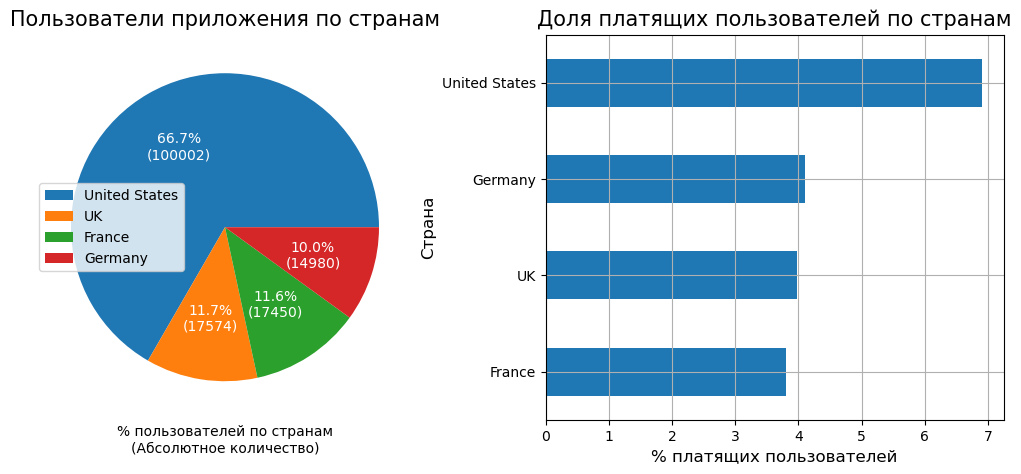

In [46]:
plt.figure(figsize=(13, 5))

ax1 = plt.subplot(1, 2, 1)
region_counts['count'].plot.pie(
    grid=True, 
    ax=ax1, 
    autopct=lambda pct: pie_pct_text(pct, region_counts['count']),
    textprops=dict(color="w"),
)
plt.title('Пользователи приложения по странам', fontsize=15)
ax = ax1.legend()
ax = ax1.set_ylabel('')
ax = ax1.set_xlabel('% пользователей по странам\n(Абcолютное количество)')

ax2 = plt.subplot(1, 2, 2)
region_counts['payers_perc'].sort_values().plot.barh(grid=True, ax=ax2)
plt.title('Доля платящих пользователей по странам', fontsize=15)
ax = ax2.set_ylabel('Страна', fontsize=12)
ax = ax2.set_xlabel('% платящих пользователей', fontsize=12)

***Вывод:***
- пользователи из США занимают две трети от всех пользователей приложения (100 002 человека);
- США - лидер по доле платящих пользователей (9.9%);
- Франция, Германия и Великобритания имеют примерное равное количество пользователей, однако в Германии больше доля платящих пользователей.

#### Девайс пользователя

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим также таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [47]:
device_counts = (
    profiles
    .groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'count', 'payer': 'payers_perc'})
    .sort_values(by='count', ascending=False)
)
device_counts.payers_perc *= 100

In [48]:
device_counts.round(2)

,count,payers_perc
device,,
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05
Mac,30042,6.36


По данной таблице построим круговую диагруму пользователей и горизонтальный столбчатый график доли платящих пользователей по девайсам.

Из него мы видим, что пользователи iPhone больше всех среди пользователей других девайсов (36.3% пользователей). Остальные девайсы имеют примерно равное соотнешение пользователей.

Однако, мы видим, чтоб большую долю платящих пользователей по девайсам имеют владельцы Mac'ов (6.36%).

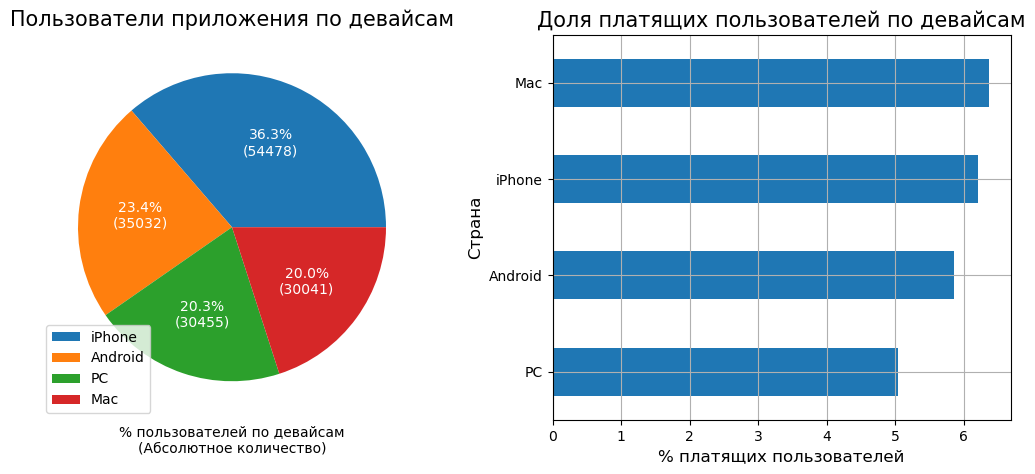

In [49]:
plt.figure(figsize=(13, 5))

ax1 = plt.subplot(1, 2, 1)
device_counts['count'].plot.pie(
    grid=True, 
    ax=ax1, 
    autopct=lambda pct: pie_pct_text(pct, device_counts['count']),
    textprops=dict(color="w"),
)
plt.title('Пользователи приложения по девайсам', fontsize=15)
ax = ax1.legend()
ax = ax1.set_ylabel('')
ax = ax1.set_xlabel('% пользователей по девайсам\n(Абcолютное количество)')

ax2 = plt.subplot(1, 2, 2)
device_counts['payers_perc'].sort_values().plot.barh(grid=True, ax=ax2)
plt.title('Доля платящих пользователей по девайсам', fontsize=15)
ax = ax2.set_ylabel('Страна', fontsize=12)
ax = ax2.set_xlabel('% платящих пользователей', fontsize=12)

***Вывод:***
- Пользователи iPhone больше всех среди пользователей других девайсов (36.3% пользователей);
- На остальных девайсах (Mac, Android, PC) примерно равное количество пользователей (20-23.4%);
- Большую долю платящих пользователей по девайсам имеют владельцы Mac'ов (7.6%).

#### Канал привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [50]:
channel_counts = (
    profiles
    .groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'count', 'payer': 'payers_perc'})
    .sort_values(by='count', ascending=False)
)
channel_counts.payers_perc *= 100

In [51]:
channel_counts.round(2).sort_values(by='payers_perc', ascending=False)

,count,payers_perc
channel,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


По данной таблице построим и горизонтальные столбчатые графики количества пользователей и доли платящих пользователей по каналам привлечениям.

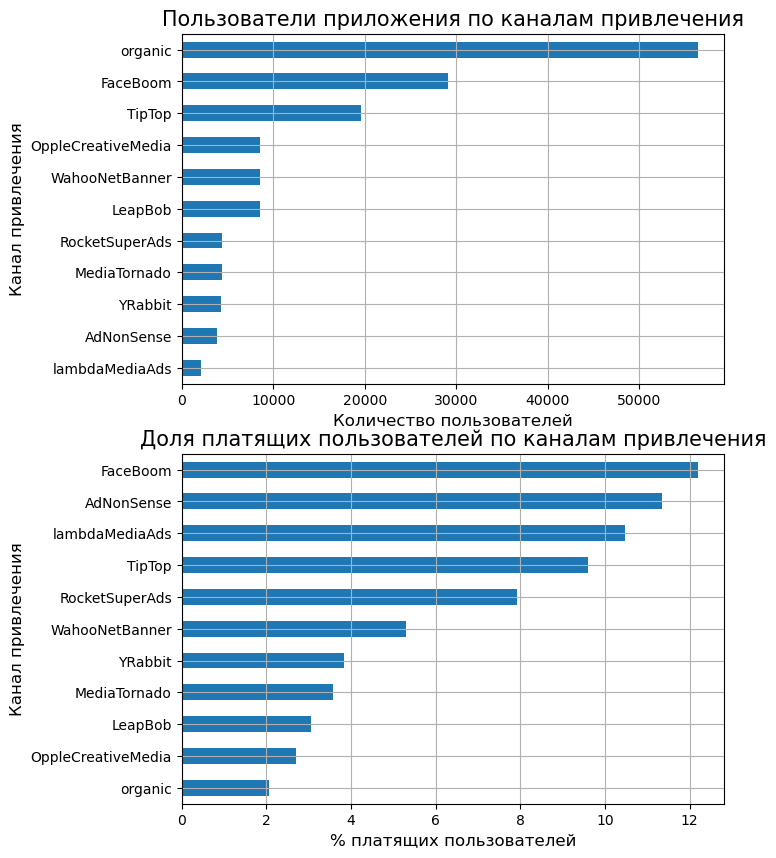

In [52]:
plt.figure(figsize=(7, 10))

ax1 = plt.subplot(2, 1, 1)
channel_counts['count'].sort_values().plot.barh(grid=True, ax=ax1)
plt.title('Пользователи приложения по каналам привлечения', fontsize=15)
ax = ax1.set_ylabel('Канал привлечения', fontsize=12)
ax = ax1.set_xlabel('Количество пользователей', fontsize=12)

ax2 = plt.subplot(2, 1, 2)
channel_counts['payers_perc'].sort_values().plot.barh(grid=True, ax=ax2)
plt.title('\nДоля платящих пользователей по каналам привлечения', fontsize=15)
ax = ax2.set_ylabel('Канал привлечения', fontsize=12)
ax = ax2.set_xlabel('% платящих пользователей', fontsize=12)

#### Корелляция между регионом и девайсом пользователя

Проаналиируем корелляцию между регионом пользователя и его девайсом, чтобы узнать где и каким устройством пользуются чаще. Из таблицы можно увидеть, что в США чаще пользуются айфоном, в Европе равномерно предочитают использовать PC и смартфоны на Android.

In [53]:
profiles.pivot_table(
    index=['device'], columns='region', values='user_id', aggfunc='nunique', fill_value=0
).style.background_gradient(axis=None)

region,France,Germany,UK,United States
device,,,,
Android,5252,4440,5141,20199
Mac,1838,1584,1778,24842
PC,6940,5945,7138,10432
iPhone,3420,3012,3518,44529


#### Корелляция между регионом и каналом привлечения

Проаналиируем корелляцию между страной пользователя и каналом его привлечения. 
Из таблицы можно увидеть, что:
- для Европы и США использются по 5 разнык рекламных кампаний;
- две самые активно используемые каналы для продвижения `FaceBoom` и `TipTop` находятся в США.

In [54]:
region_channels = profiles.pivot_table(index=['channel'], columns='region', values='user_id', aggfunc='nunique', fill_value=0) \
    .drop('organic', axis=0) \
    .sort_values(by='United States', ascending=False) \
    .style.background_gradient(axis=None)
region_channels

region,France,Germany,UK,United States
channel,,,,
FaceBoom,0,0,0,29144
TipTop,0,0,0,19561
RocketSuperAds,0,0,0,4448
MediaTornado,0,0,0,4364
YRabbit,0,0,0,4312
AdNonSense,1366,1219,1295,0
LeapBob,2988,2519,3046,0
OppleCreativeMedia,2991,2562,3052,0
WahooNetBanner,2971,2579,3003,0


***Вывод:***

Исходя из таблицы и графиков количества пользователей и доли платящих пользователей по каналам привлечения, можно сделать слудующие выводы:
- cамая большая доля пользователей пришла органически путем через знакомых или поисковики (56439 человек), однако, доля платящих пользователей ниже, чем у платных каналов привлечения (2%);
- существуют каналы с относительно небольшим охватом привлечения, но с высокой долей платящих пользователей, а именно `lambdaMediaAds` (10.5%), `AdNonSense` (11.3%), `RocketSuperAds` (7.9%);

Каналы привлечения четко разделены по странам:
- для привлечения пользователей из США используются каналы `FaceBoom`, `TipTop`, `RocketSuperAds`, `MediaTornado`, `YRabbit`;
- В Европе используются каналы `OppleCreativeMedia`, `LeapBob`, `WahooNetBanner`, `AdNonSense`, `lambdaMediaAds`.

В США чаще пользуются айфоном, в Европе равномерно предочитают использовать PC и смартфоны на Android.


***Рекомендации:***

В приоритетном порядке необходимо рассматривать каналы привлечения для раскрутки, доля платящих пользователей которых превышет более 6.5% (общая доля платящих пользователей). В частности, нужно больше обратить внимение на такие каналы как `lambdaMediaAds`, `AdNonSense`, `RocketSuperAds`, поскольку на хорошую долую платящих пользователей, они задают небольшой охват пользователей. 

Также из-за низкой доли платащих пользователей, пришедших органическим путем, стоит изучить страницу ProcrastinatePro+ в магазинах приложений на предмет улучшения.

### Маркетинг

#### Общая сумма расходов и по каналам привлечения

Общая сумма расходов на маркетинг, исходя из расчета, составляет 105497.3 долларов.

In [55]:
total_costs = costs.costs.sum()
total_costs.round(2)

105497.3

Расчитаем и выведем траты и долю расходов по рекламным компаниям и регионом (США и Европа). Заметим, что для органического привлечения мы не тратим никаких средств.

In [56]:
usa_channels = ['FaceBoom','TipTop', 'RocketSuperAds', 'MediaTornado', 'YRabbit']
costs['region'] = costs.channel.isin(usa_channels).map({True: 'United States', False: 'Europe'})
channel_costs = costs.groupby('channel').agg({'costs': 'sum', 'region': 'first'})
channel_costs = channel_costs.sort_values(by='costs', ascending=False)

In [57]:
channel_costs.costs

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

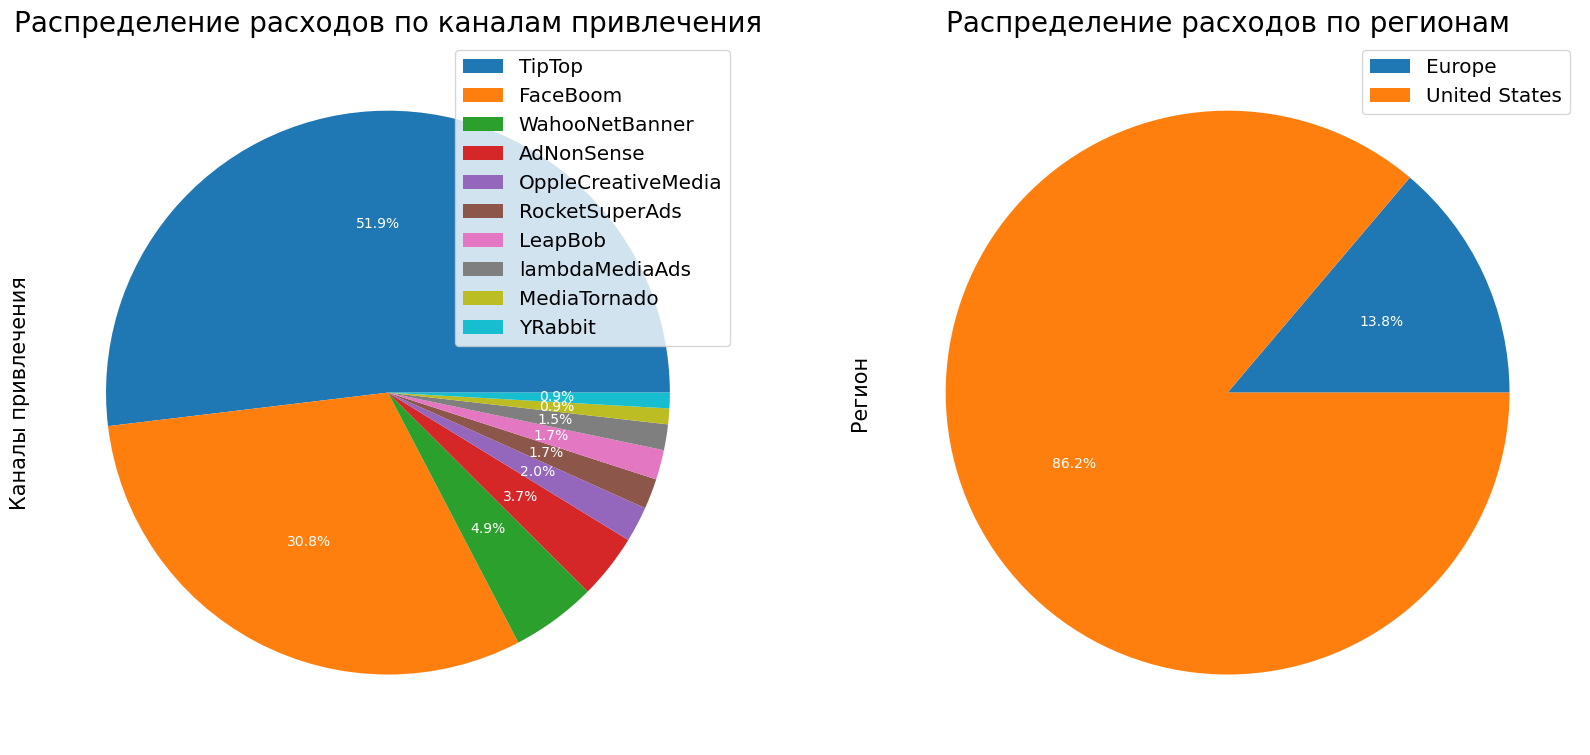

In [58]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
channel_costs.costs.plot.pie(
    ax = ax1,  
    autopct=lambda pct: "{:.1f}%".format(pct), 
    textprops=dict(color="w")
)
ax1.set_title('Распределение расходов по каналам привлечения', fontsize=20)
ax1.set_ylabel('Каналы привлечения', fontsize=15)
ax1.legend(loc='upper right', fontsize='x-large') 

ax2 = plt.subplot(1, 2, 2)
channel_costs.groupby('region').costs.sum().plot.pie(
    ax = ax2,
    autopct=lambda pct: "{:.1f}%".format(pct), 
    textprops=dict(color="w")
)
ax2.set_title('Распределение расходов по регионам', fontsize=20)
ax2.set_ylabel('Регион', fontsize=15)
ax2.legend(loc='upper right', fontsize='x-large') 


plt.tight_layout()
plt.show()

***Вывод:***

- Общие расходы на рекламные кампании за полгода вливания составляют 105497.3 долларов;
- На США призодиятся 86.2% всех расходов на привлечение пользователей, две основными кампаниями которых являются `TipTop` (более 54 тысяч привлеченных пользователей; 51.9%), `FaceBoom` (более 32 тысяч пользователей; 30.8%).

#### Динамика расходов по каналам привлечения

Построим таблицы и графики
динамики расходов на рекламные кампании в США и Европе по неделям в 2019 году.

In [59]:
channel_costs_by_week = pd.pivot_table(
    costs,
    index=['region', 'channel'],
    columns='dt_week',
    values='costs',
    aggfunc='sum'
)
last_week = max(channel_costs_by_week.columns)
channel_costs_by_week = channel_costs_by_week.sort_values(by=last_week, ascending=False)

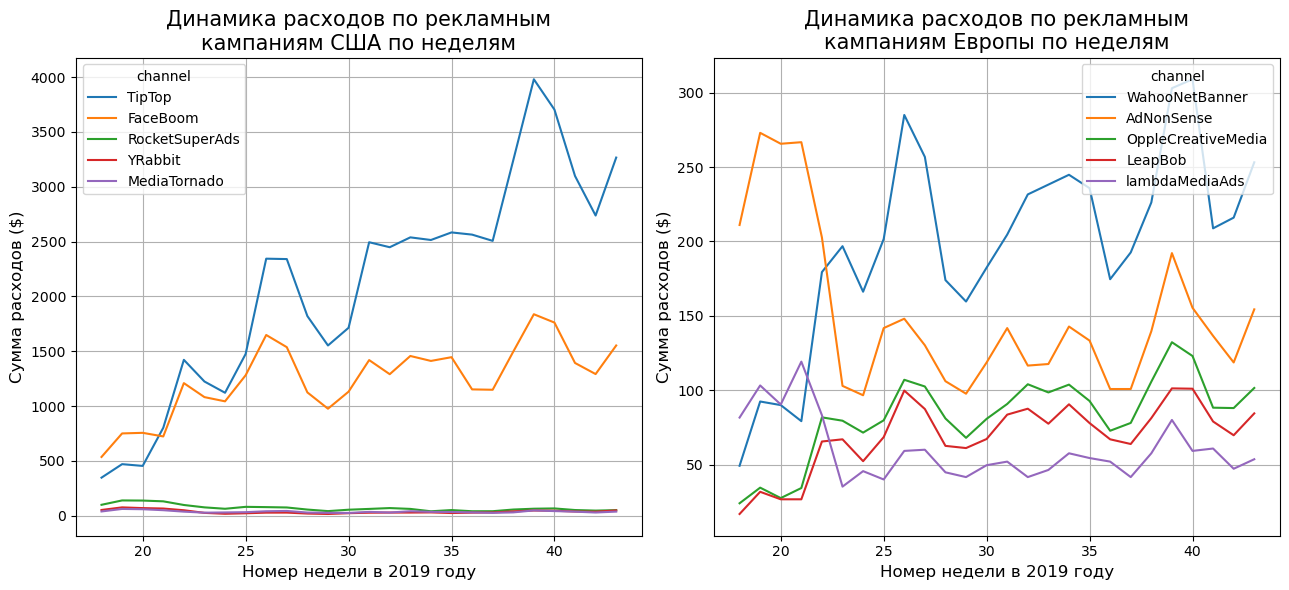

In [60]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
channel_costs_by_week.query('region == "United States"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax1)
res = ax1.set_title('Динамика расходов по рекламным\nкампаниям США по неделям', fontsize=15)
res = ax1.set_xlabel('Номер недели в 2019 году', fontsize=12)
res = ax1.set_ylabel('Сумма расходов ($)', fontsize=12)


ax2 = plt.subplot(1, 2, 2)
channel_costs_by_week.query('region == "Europe"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax2)
res = ax2.set_title('Динамика расходов по рекламным\nкампаниям Европы по неделям', fontsize=15)
res = ax2.set_xlabel('Номер недели в 2019 году', fontsize=12)
res = ax2.set_ylabel('Сумма расходов ($)', fontsize=12)

plt.tight_layout()
plt.show()

Построим таблицу и график динамики расходов на рекламные кампании по месяцам в 2019 году.

In [61]:
channel_costs_by_month = pd.pivot_table(
    costs,
    index=['region', 'channel'],
    columns='dt_month',
    values='costs',
    aggfunc='sum'
)
last_month = max(channel_costs_by_month.columns)
channel_costs_by_month = channel_costs_by_month.sort_values(by=last_month, ascending=False)
months = dict(enumerate(calendar.month_abbr))
channel_costs_by_month.columns = list(months[i] for i in channel_costs_by_month.columns)

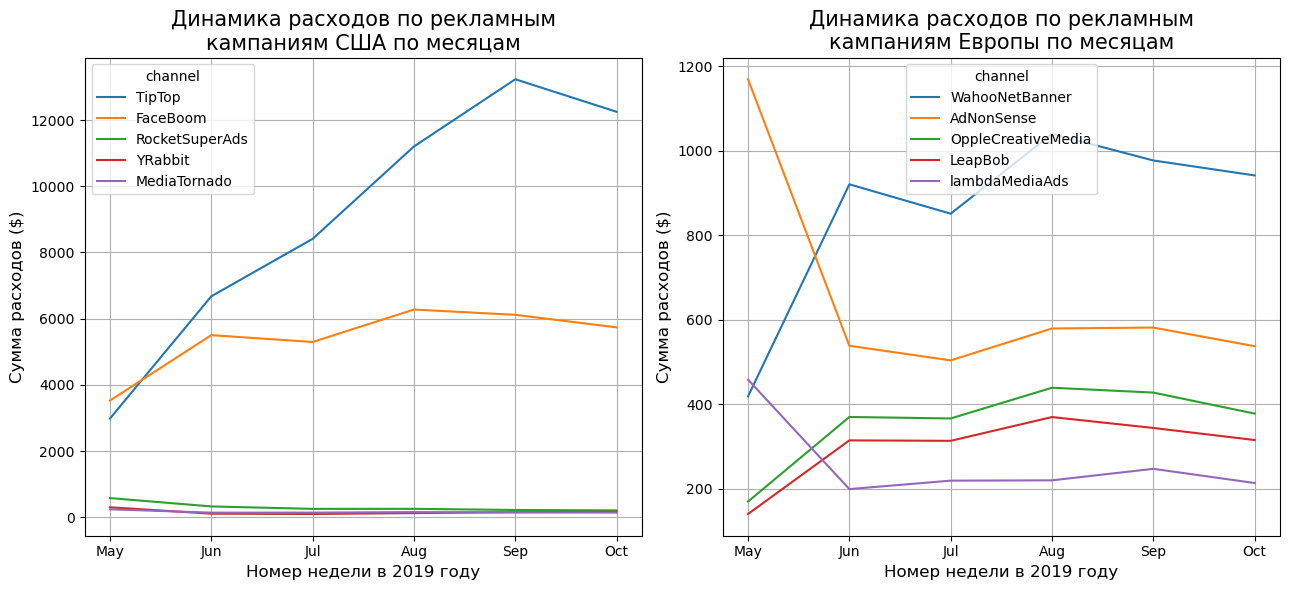

In [62]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
channel_costs_by_month.query('region == "United States"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax1)
res = ax1.set_title('Динамика расходов по рекламным\nкампаниям США по месяцам', fontsize=15)
res = ax1.set_xlabel('Номер недели в 2019 году', fontsize=12)
res = ax1.set_ylabel('Сумма расходов ($)', fontsize=12)


ax2 = plt.subplot(1, 2, 2)
channel_costs_by_month.query('region == "Europe"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax2)
res = ax2.set_title('Динамика расходов по рекламным\nкампаниям Европы по месяцам', fontsize=15)
res = ax2.set_xlabel('Номер недели в 2019 году', fontsize=12)
res = ax2.set_ylabel('Сумма расходов ($)', fontsize=12)

plt.tight_layout()
plt.show()

***Вывод:***

Расходы на кампании по месяцам растут с каждым месяцем за счет постоянного увеличения расходов на рекламу `TipTop` и `FaceBoom`.

На кампанию `TipTop` рекламные расходы в месяц варировались увеличивались с 2981 до 13232 долларов.
На кампанию `FaceBoom` рекламные расходы в месяц варьировались увеличивались с 3524 до 6274 долларов.

На другие рекламные кампании не тратилось больее чем 1070$ (в мае на кампанию `AdNonSense`).

Также по динамике расходов на рекламу `TipTop` и `FaceBoom` по неделям, можно увидеть локальные пики (22, 26, 27, 39 недели), за которым следует спад на расходы. Такое поведение скорее всего обусловлено импульсивным вливанием на рекламу.

#### Стоимость привлечения одного пользователям по каналам привлечения

Вычислим среднюю стоимость привлечения одного пользователя по каждому рекламному каналу привлечения.

In [63]:
channel_acq_cost = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).acquisition_cost
channel_acq_cost = channel_acq_cost.sort_values(ascending=False)

In [64]:
channel_acq_cost

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

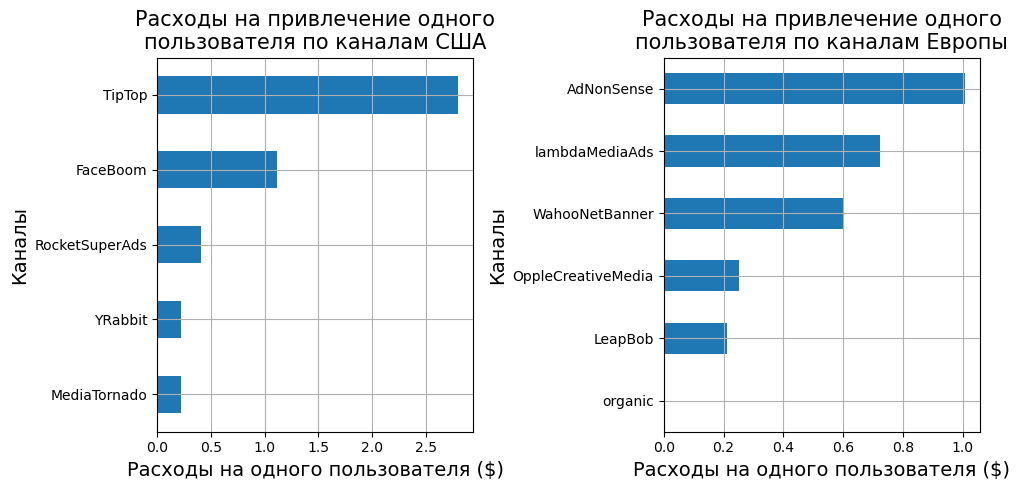

In [65]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1, 2, 1)
channel_acq_cost[channel_acq_cost.index.isin(usa_channels)].sort_values(ascending=True) \
    .plot(kind='barh', figsize=(10, 5), grid=True, ax=ax1)
res = ax1.set_title("Расходы на привлечение одного\nпользователя по каналам США", fontsize=15)
res = ax1.set_xlabel("Расходы на одного пользователя ($)", fontsize=14)
res = ax1.set_ylabel("Каналы", fontsize=14)

ax2 = plt.subplot(1, 2, 2)
channel_acq_cost[~channel_acq_cost.index.isin(usa_channels)].sort_values(ascending=True) \
    .plot(kind='barh', figsize=(10, 5), grid=True, ax=ax2)
res = ax2.set_title("Расходы на привлечение одного\nпользователя по каналам Европы", fontsize=15)
res = ax2.set_xlabel("Расходы на одного пользователя ($)", fontsize=14)
res = ax2.set_ylabel("Каналы", fontsize=14)

plt.tight_layout()
plt.show()

***Вывод:***

Вычислив среднюю стоимость привлечения одного пользователя по каждому рекламному каналу привлечения, можно сделать вывод, что есть одна рекламная кампания `TipTop` с аномально высокой ценой за одного пользователя (2.8 долларов на человека), которая с большой долей вероятностью не окупается доходами за покупки.

Также есть две рекламные кампании `FaceBoom` (1.1 доллар) и `AdNonSense` (1 доллар) со средней стоимостью привлечения близкие к ОБЩЕМУ среднему (1.13 долларов).

Для пользователей, привлеченных органическим путем, не нужно никаких влияний.

#### Общий вывод
Проанализировав маркетинговые расходы можно сделать следующие выводы:
- Общие расходы на рекламные кампании за полгода вливания составляют 105497.3 долларов;
- На `США` приходиятся 86.2% всех расходов на привлечение пользователей, две основными кампаниями которых являются `TipTop` (51.9%), `FaceBoom` (30.8%);
- Расходы на кампании растут с каждым месяцем за счет постоянного увеличения расходов на рекламу `TipTop` и `FaceBoom`;
- Средняя стоимость рекламы на одного пользователя составляет 1.13 долларов на человека (без учета органических пользователей);
- Расходы на привлечение одного пользователя из `TipTop` составляет около 2.8 долларов на человека, которая с большой долей вероятностью не окупается доходами за покупки.
- Также есть две рекламные кампании `FaceBoom` (1.1 доллар) и `AdNonSense` (1 доллар) со средней стоимостью привлечения близкие к ОБЩЕМУ среднему (1.13 долларов).

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общая окупаемость

Проанализируем общую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [66]:
date = datetime(2019, 11, 1)
dims = []
horizont = 14
no_profiles = profiles.query("channel != 'organic'")
ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(no_profiles, orders, date, horizont, dims)

Выведем значения LTV продаж на 7 и 14 день.

In [67]:
ltv[['cohort_size', 6, 13]].round(3)

,cohort_size,6.0,13.0
cohort,,,
All users,88644,0.694,0.902


Выведем значения LTV продаж на 7 и 14 день.

In [68]:
roi_grouped[['cohort_size', 'cac', 6, 13]].round(3)

,cohort_size,cac,6.0,13.0
cohort,,,,
All users,88644,1.118,0.621,0.807


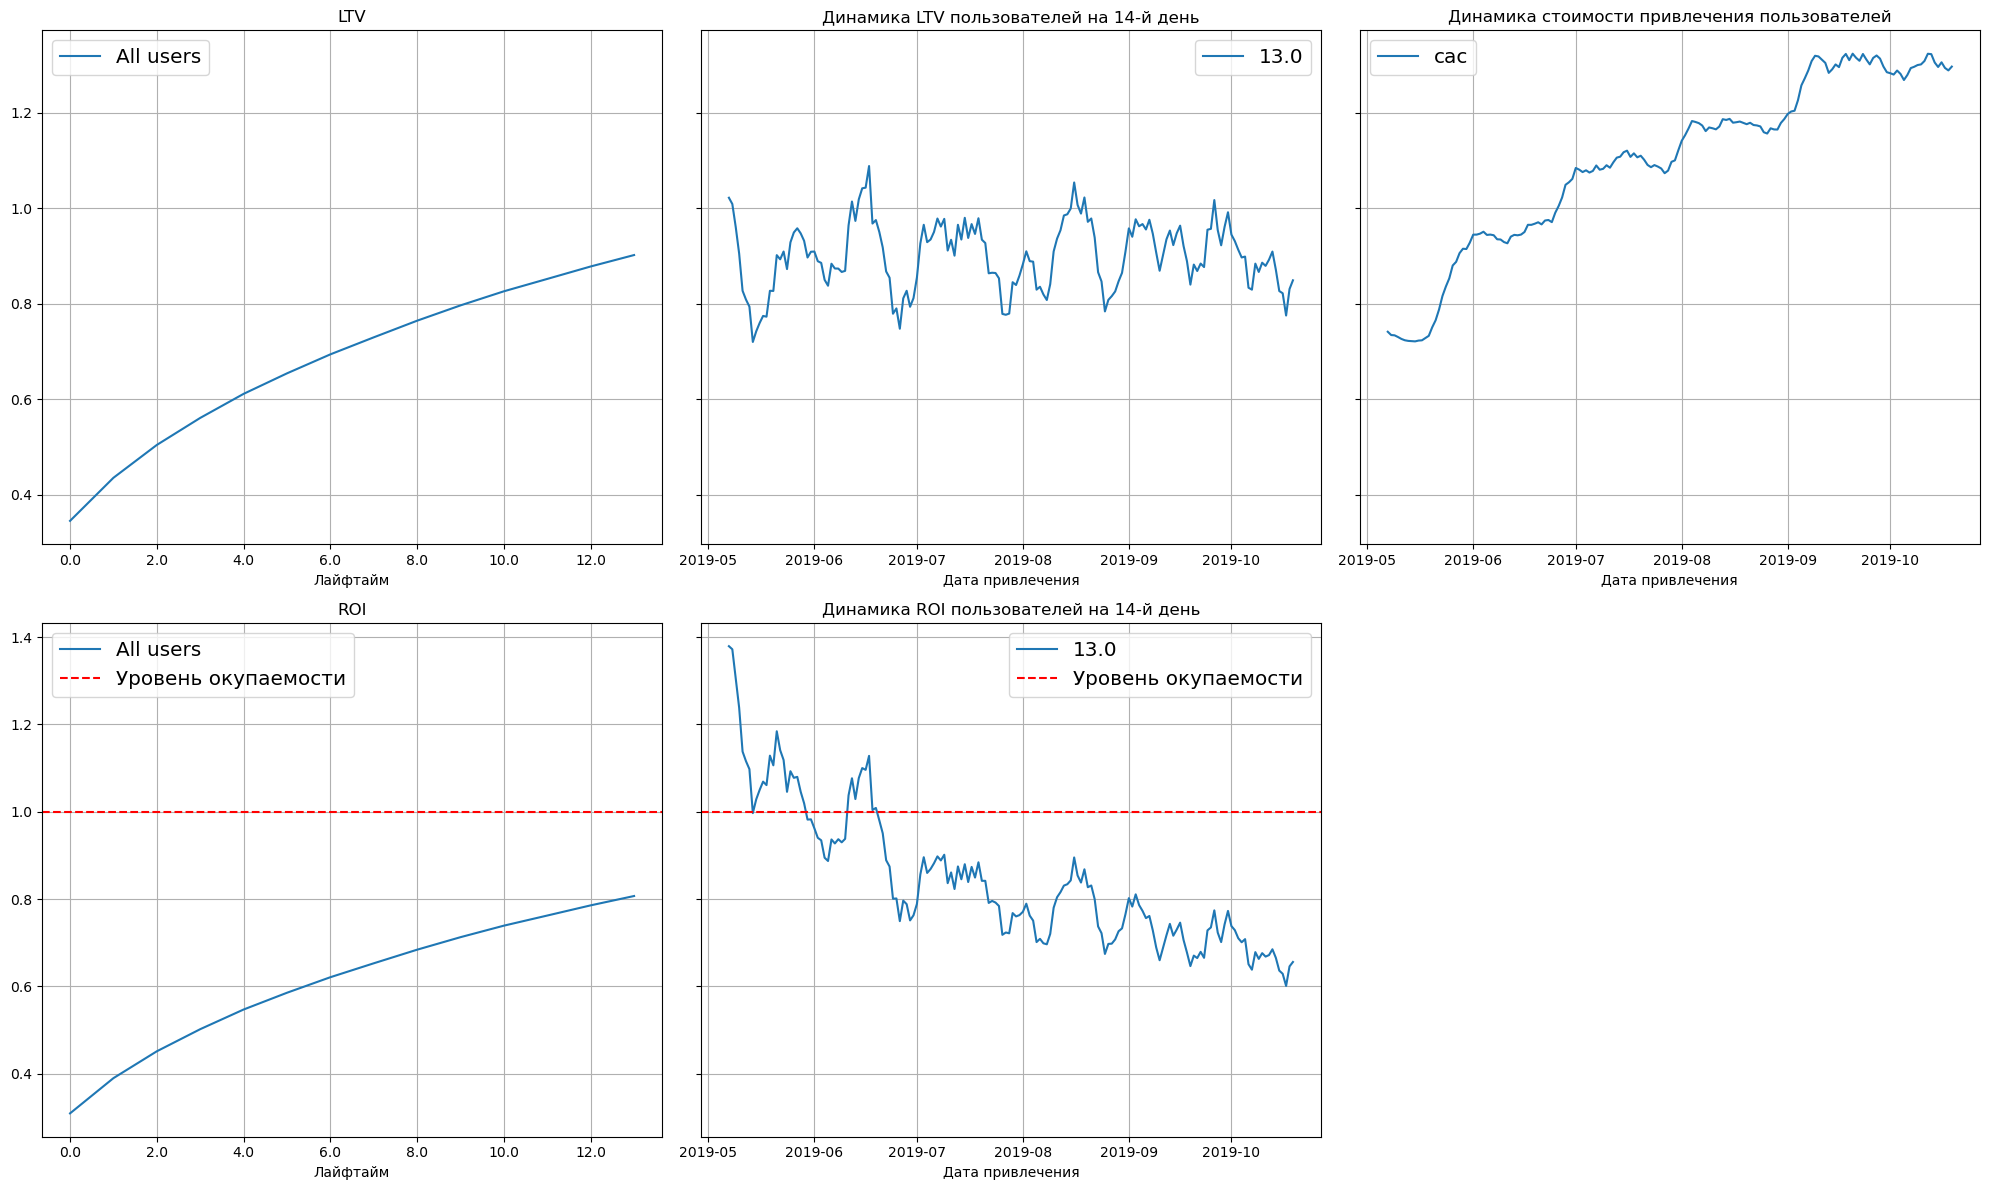

In [69]:
plot_ltv_roi(ltv, ltv_history, roi_grouped, roi_history, 14)

Вычислим самое низкое значение стоимости привлечения рекламы в мае 2019.

In [79]:
print('Самое низкая стоимость привлечения CAC в динамике - {:.2f} долларов.'.format(roi_history['cac'].min()))

Самое низкая стоимость привлечения CAC в динамике - 0.71 долларов.


***Вывод:***

Проанализировав общую окупаемость рекламы можно сделать следующие выводы:
- коэфициент окупаемости рекламы на 14-ый день чуть ниже порогового значения (ROI - 0.81), что означает убыточность первых двух недель после привлечения клиента;
- относительно стабильную динамику LTV на 14-ый день на протяжении всего периода наблюдения (колеблется на уровне среднего значения 0.9 долларов);
- с каждым месяцем растет стоимость привлечения рекламы на протяжении всего периода наблюдения;
- можно наблюдать убывающую динамику окупаемости рекламы; тем не менее можно заметить, что на момент начала мая по июнь можно наблюдать хорошую окупаемость, но из-за растущей динамики стоимости привлечения клиента реклама быстро становится убыточной;
- в мае самое низкая стоимость привлечения клиента составляло 0.71 долларов. 

***Рекомендации:***

Необходимо проанализировать причины растущей стоимости привлечения рекламы и понять, что можно сделать для снижения ее расходов до майских показателей.

#### Окупаемость рекламы по девайсам

Проанализируем окупаемость по рекламным кампаниям c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.<br> 
Дата наблюдения - 1 ноября 2019 года. <br>
Горизонт окупаемости - 14 дней.

In [ ]:
dims = ['device']
d_ltv_raw, d_ltv, d_ltv_history, d_roi_grouped, d_roi_history = get_ltv(no_profiles, orders, date, horizont, dims)

In [ ]:
d_roi_grouped[['cohort_size', 'cac', 13]]

In [ ]:
plot_ltv_roi(d_ltv, d_ltv_history, d_roi_grouped, roi_history, 14)

***Выводы:***

Приложение является окупаемым только для устройства PC(ROI - 1.05), однако нельзя одназначно сделать вывод, что окупаемость зависит от устройства использования, поскольку графики динамик LTV, CAC и ROI схожи по линиям.

Мы можем предположить, что окупаемость приложения больше зависит от региона и каналов привлечения, если увидим больше расхождений от среднего.

#### Окупаемость рекламы с разбивкой по странам
Проанализируем окупаемость с разбивкой по странам c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.<br> 
Дата наблюдения - 1 ноября 2019 года. <br>
Горизонт окупаемости - 14 дней.

In [ ]:
dims = ['region']
r_ltv_raw, r_ltv, r_ltv_history, r_roi_grouped, r_roi_history = get_ltv(no_profiles, orders, date, horizont, dims)

In [ ]:
r_roi_grouped[['cohort_size', 'cac', 13]]

In [ ]:
plot_ltv_roi(r_ltv, r_ltv_history, r_roi_grouped, r_roi_history, horizont)

***Выводы:***

По графиками можно сделать однозначный вывод, что все убытки происходят из-за высокой и постоянно растущей стоимости привлечения одного пользователя из США, поскольку несмотря на более высокие значения LTV, чем у стран Европы, реклама из США не является неокупаемой (ROI - 0.68). Из-за того, что основные разходы на маректинг приходится на США (86.2%), это и является основной причиной убытков, кампании.

Польователи из Европы являются хорошо окупаемыми (ROI от 1.45 до 1.63) и можно продолжать расширять вливания в их каналы привлечения.

#### Окупаемость рекламы с разбивкой по кампаниям в США

Проанализируем окупаемость по рекламным кампаниям в США c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.<br> 
Дата наблюдения - 1 ноября 2019 года. <br>
Горизонт окупаемости - 14 дней.

In [ ]:
dims = ['channel']
profiles_usa = no_profiles.query('region == "United States"')
usa_ltv_raw, usa_ltv, usa_ltv_history, usa_roi_grouped, usa_roi_history = \
    get_ltv(profiles_usa, orders, date, horizont, dims)

In [ ]:
usa_ltv_short = usa_ltv[['cohort_size', 0, 6, 13]].sort_values(by='cohort_size', ascending=False)
usa_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

In [ ]:
plot_ltv_roi(usa_ltv, usa_ltv_history, usa_roi_grouped, usa_roi_history, 14)

Пострив графики LTV и ROI и динамики LTV, CAC и ROI можно заметить несколько интересных вещей (прежде всего будем обращать внимение на рекламу `FaceBoom` и `TipTop`, поскольку более 80 процентов расходов приходятся на эти  две площадки):
1. Самое главное, что нужно выделить из графика ROI, что есть всего 2 площадки, где коэфициент ROI ниже уровня окупаемости, то есть являются убычтоными: `FaceBoom`, `TipTop`. Выведем дополнительно значения ROI на 7-й и 14-й день по рекламным компаниям, чтобы больше убедиться в убыточности вливания на эти площадки.

In [ ]:
usa_roi_grouped[['cohort_size', 'cac', 6, 13]] \
    .sort_values(by='cohort_size', ascending=False) \
    .style.background_gradient(subset=[6, 13])

Проведем дальнейшее исследование и посчитаем процент пользователей, перешедших из убыточных рекламных кампаний, и долю расходов на эти три кампании.

In [ ]:
usa_lesion_cohort_size = usa_roi_grouped[usa_roi_grouped[13] < 1].cohort_size.sum()
usa_cohort_size = usa_roi_grouped.cohort_size.sum()
print(
    'Доля когорты пользователей, пришедших из убыточных рекламных кампаний США:', 
    (usa_lesion_cohort_size / usa_cohort_size * 100).round(2)
)

Доля расходов на убыточные рекламные кампании в США состовляют около 96 процентов.

In [ ]:
usa_lesion_costs = channel_costs[channel_costs.index.isin(['FaceBoom','TipTop'])].costs.sum()
usa_all_costs = channel_costs[channel_costs.region == "United States"].costs.sum()
print(
    'Доля расходов на убыточные рекламные кампании:', 
    (usa_lesion_costs / usa_all_costs * 100).round(2)
)

2. Если разбирать более показатели LTV и СAC, то можно заметить, что у площадки и `FaceBoom`  стоимость привлечения одного пользователя CAC на весь полугодний период был стабильным, но c высоким на уровне 1.1 доллара за 1 привлеченного клиента (по сравнению со средним значением стоимости привлечения - см. пункт 4.3); значение LTV у кампаний `FaceBoom` на 14 день составляет около 0.73 долларов, что ниже значения CAC;
3. Площадка `TipTop` занимает второе место по значению LTV среди остальных кампаний (1.5 долларов с клиента) и эта динамика наблюдалась на протяжении всего периода наблюдения. Однако, стоимость привлечения пользователя с каждым месяцем скачкообразно росла (с каждым месяцем на 0.4-0.7 долларов). Из-за этого площадка, которая была доходной на момент начала мая, быстро стала убыточной.
4. Если более детальнее изучить вливание двух наиболее успешных рекламных кампаний в США по показателю ROI, то можно сделать выводы, что `YRabbit` и `MediaTornado` в большой степени окупаются за счет низкой стоимости привлечения пользователя (0.22 доллара), несмотря на низкие значения LTV (0.53-0.55 долларов);

Дополнительно, важной составляющей окупаемости канала явлсяется стабильные значения стоимости привлечения, поскольку при значения LTV может сильно колебаться в моменте и таком же нестабильном CAC сложно прогнозировать окупаемость рекламы.

***Вывод:***

Проанализировав окупаемость рекламы по рекламным кампаниям можно сделать следующие выводы:
- вычислены три убыточные рекламные кампании, чья суммарная доля пользователей (не считая тех, кто пришел органическим путем) составляет 56% и чья суммарная доля расходов на эти компании составляет 86%: `FaceBoom`, `TipTop` и `AdNonSense`;
- остальные кампании можно назвать окупаемыми; две кампании более чем на половину от стоимости привлечения `WahooNetBanner` (ROI - 1.53 на 14 день) и `OppleCreativeMedia` (ROI - 1.64 на 14 день), остальные имеют показатель ROI выше 2.24 на 14 день;
- причинами убыточности кампаний `FaceBoom` и `AdNonSense` является высокая, хоть и стабильная стоимость привлечения (CAC - 1-1.1 доллар), и низкие значения LTV продаж на 14 день (0.8 долларов);
- причиной убыточности кампании `TipTop`, несмотря на хороший LTV продаж (второе место, среди остальных кампаний), является аномальная высокая стоимость привлечения, которая растет скачкообразном образом каждый месяц;
- важным показателем для хорошей окупаемости в первую очередь является соотношение доходов и стоимость привлечение клиента; однако при низком значении привлечения CAC существует меньше рисков неокупаемости рекламы, поскольку динамика покупок LTV нестабильна на протяжении всего периода наблюдения.

#### Окупаемость рекламы с разбивкой по кампаниям в европейских странах

Проанализируем окупаемость по рекламным кампаниям Европы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.<br> 
Дата наблюдения - 1 ноября 2019 года. <br>
Горизонт окупаемости - 14 дней.

In [ ]:
dims = ['channel']
profiles_usa = no_profiles.query('region != "United States"')
eu_ltv_raw, eu_ltv, eu_ltv_history, eu_roi_grouped, eu_roi_history = get_ltv(profiles_usa, orders, date, horizont, dims)

In [ ]:
eu_ltv_short = eu_ltv[['cohort_size', 0, 6, 13]]
eu_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

In [ ]:
eu_roi_grouped[['cohort_size', 'cac', 13]]

In [ ]:
plot_ltv_roi(eu_ltv, eu_ltv_history, eu_roi_grouped, eu_roi_history, 14)

***Вывод:***

Несмотря на хорошую общую окупаемость реклам Европы, есть  один убыточный канал привлчения `AdNonSense` (ROI - 0.83) из-за высокой стоимости привлечения одного пользователя (1 доллар).

Необходимо отметить, что окупаемость во сногом зависит от стабильной и низкой стоимости привлечения пользователя, посколькку по динамике LTV нельзя однозначно сказать будет ли высокой в небольшом периоде наблюдения.

#### Конверсия пользователей в покупки

##### Общая конверсия пользователей в покупки

Проанализируем общую конверсию пользователей в покупки.

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(no_profiles, orders, date, horizont)

In [ ]:
conversion[['cohort_size', 0, 6, 13]].round(3)

In [ ]:
plot_conversion(conversion, conversion_history, horizont)

***Вывод:***

По данным можно сделать следующие выводы:
- основная доля первых покупок происходит в первый день посещение пользователя в приложение (5.9%);
- на 14 день доля доля покупок состосавляет 8% (на 3.1% больше, чем в первый день);
- большая часть покупок происходят в первые 10 дней с момента посещения.

##### Конверсия пользователей в покупки по странам

Проанализируем общую конверсию пользователей в покупки с разбивкой по странам.

In [ ]:
reg_conversion_raw, reg_conversion, reg_conversion_history = \
    get_conversion(profiles, orders, date, horizont, ['region'])

In [ ]:
reg_conversion[['cohort_size', 0, 6, 13]].round(3)

In [ ]:
plot_conversion(reg_conversion, reg_conversion_history, horizont)

***Вывод:***

По данным можно сделать следующие выводы:
- с отрывом наибольшая конверсия в покупки у пользователей из США (6.7% на 14 день);
- конверсия в покупки у стран Европы колеблятся от 3.7% до 4% на 14 день.

##### Конверсия пользователей в покупки по каналам привлечения в США

Проанализируем конверсию пользователей в покупки по каналам привлечения в США.

In [ ]:
usa_profiles = no_profiles.query("region == 'United States'")
usa_conversion_raw, usa_conversion, usa_conversion_history = \
    get_conversion(usa_profiles, orders, date, horizont, ['channel'])

In [ ]:
usa_conversion[['cohort_size', 13]].sort_values(by=13, ascending=False)

In [ ]:
plot_conversion(usa_conversion, usa_conversion_history, horizont)

***Вывод:***

Конверсия пользователей в покупки сильно отличается в зависимости от канала привлечения.
Пользователи из каналов `FaceBoom`(12% на 14 день) и `TipTop`(9.4% на 14 день) имеют самый высокую конверсию в покупки.

##### Конверсия пользователей в покупки по каналам привлечения в Европе

Проанализируем конверсию пользователей в покупки по каналам привлечения в Европе.

In [ ]:
eu_profiles = no_profiles.query("region != 'United States'")
eu_conversion_raw, eu_conversion, eu_conversion_history = \
    get_conversion(eu_profiles, orders, date, horizont, ['channel'])

In [ ]:
eu_conversion[['cohort_size', 13]].sort_values(by=13, ascending=False)

In [ ]:
plot_conversion(eu_conversion, eu_conversion_history, horizont)

***Вывод:***

Конверсия пользователей в покупки сильно отличается в зависимости от канала привлечения.
Пользователи из каналов `AdNonSense`(10.7% на 14 день) и `lambdaMediaAds`(10.4% на 14 день) имеют самый высокую конверсию в покупки.

##### Конверсия пользователей в покупки по девайсам

Проанализируем конверсию пользователей в покупки по каналам привлечения по девайсам.

In [ ]:
d_conversion_raw, d_conversion, d_conversion_history = \
    get_conversion(no_profiles, orders, date, horizont, ['device'])

In [ ]:
d_conversion[['cohort_size', 13]].sort_values(by=13, ascending=False)

In [ ]:
plot_conversion(d_conversion, d_conversion_history, horizont)

***Вывод:***

Конверсия пользователей в покупки не сильно отличается в зависимости от девайсом.
Единственное, конверсия в покупке относильно низкая у пользователей, пользующиеся персноальными компьютерами.

##### Общий вывод по конверсии

По данным конверсии пользователей в покупки можно сделать следующие выводы:
- Основная доля первых покупок происходит в первый день посещение пользователя в приложение (5.9%);
- На 14 день доля доля покупок состосавляет 8% (на 3.1% больше, чем в первый день);
- Большая часть покупок происходят в первые 10 дней с момента посещения;
- С отрывом наибольшая конверсия в покупки у пользователей из США (6.7% на 14 день);
- Конверсия в покупки у стран Европы колеблятся от 3.7% до 4% на 14 день;
- Конверсия пользователей в покупки сильно отличается в зависимости от канала привлечения;
- Пользователи из каналов `FaceBoom`(12% на 14 день), `AdNonSense`(10.7% на 14 день), `lambdaMediaAds`(10.4% на 14 день) и `TipTop`(9.3% на 14 день) имеют самый высокую конверсию в покупки. 
- Конверсия пользователей в покупки не сильно отличается в зависимости от девайсом. Единственное, конверсия в покупке относильно низкая у пользователей, пользующиеся персноальными компьютерами (4.9%).

#### Удержание пользователей

##### Общee удержание пользователей

Проанализируем общее удержание с разбивкой по платящим и неплатящими пользователеми.

In [ ]:
retention_raw, retention, retention_history = get_retention(no_profiles, visits, date, horizont)

In [ ]:
retention[[1, 6, 13]].round(3)

In [ ]:
plot_retention(retention, retention_history, horizont)

***Выводы:***
- Удержание пользователей, совершивших покупки, снижается до 10.6% и не снижается ниже 8% (в значении скользящего среднего c окном в 14 дней); 
- Удержание пользователей, НЕ совершивших покупки, снижается до 0.5% и находится на низком уровне на протяжении всего периода наблюдения.

##### Удержание пользователей по регионам

Проанализируем общее удержание с разбивкой по платящим и неплатящими пользователеми и по странам.

In [ ]:
r_retention_raw, r_retention, r_retention_history = get_retention(no_profiles, visits, date, horizont, ['region'])

In [ ]:
r_retention[['cohort_size', 13]]

In [ ]:
plot_retention(r_retention, r_retention_history, horizont)

***Выводы:***
- Удержание пользователей, совершивших покупки, в США (9% удержания на 14 день) ниже стран Европы во всем двухнедельном лайфтайме (13.5-18%  удержания на 14 день);
- Удержание пользователей, НЕ совершивших покупки, низкая схожа во всех регионах и по лайфтайму и динамике на 14 день.


Несмотря на хорошую конверсию пользователей США в покупки относительно стран Европы, удержание пользователей США ниже.

##### Удержание пользователей по каналам привлечения в США

Проанализируем общее удержание с разбивкой по платящим и неплатящими пользователеми и по каналам привлечения в США.

In [ ]:
usa_retention_raw, usa_retention, usa_retention_history = \
    get_retention(usa_profiles, visits, date, horizont, ['channel'])

In [ ]:
usa_retention[['cohort_size', 13]].round(3)

In [ ]:
plot_retention(usa_retention, usa_retention_history, horizont)

***Вывод:***

По данным можно наблюдать, что удержание платящих пользователей, привлеченный канала привлечения `FaceBoom` (доля удержаения 14 день - 1.3%), сильно низкая относительно других рекламных кампании на 14-ый день (и даже ниже, чем удержание срежи органических пользователей) и общего срееднего по всем пользователям (доля удержаения 14 день - 10.6%).

Необходимо выяснить причины такого низкого удержания и как рекламируется приложения на этой площадке.

Из-за этого можно наблюдать медленный рост значения LTV до 14 дня, несмотря на ее самое высокое значение в 1 день среди других каналов привлечение США и самой высокой конверсии в покупки.

In [ ]:
usa_ltv_short['diff_0_13'] = usa_ltv_short[13] - usa_ltv_short[0]
usa_ltv_short = usa_ltv_short.sort_values(by='diff_0_13', ascending=False)
usa_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

##### Удержание пользователей по каналам привлечения в Европе

In [ ]:
eu_profiles = no_profiles.query("region != 'United States'")
eu_retention_raw, eu_retention, eu_retention_history = \
    get_retention(eu_profiles, visits, date, horizont, ['channel'])

In [ ]:
eu_retention[[6, 13]].round(3)

In [ ]:
plot_retention(eu_retention, eu_retention_history, horizont)

***Вывод:***

По данным можно наблюдать, что удержание платящих пользователей, привлеченный канала привлечения `AdNonSense` (доля удержаения 14 день - 2.7%), сильно низкая относительно других рекламных кампании на 14-ый день (и даже ниже, чем удержание срежи органических пользователей) и общего срееднего по всем пользователям (доля удержаения 14 день - 10.6%).

Необходимо выяснить причины такого низкого удержания и как рекламируется приложения на этой площадке.

Из-за этого можно наблюдать медленный рост значения LTV до 14 дня, несмотря на ее самое высокое значение в 1 день среди других каналов привлечение США и самой высокой конверсии в покупки в Европе.

In [ ]:
eu_ltv_short['diff_0_13'] = eu_ltv_short[13] - eu_ltv_short[0]
eu_ltv_short = eu_ltv_short.sort_values(by='diff_0_13', ascending=False)
eu_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

##### Удержание пользователей по девайсам

In [ ]:
d_retention_raw, d_retention, d_retention_history = \
    get_retention(no_profiles, visits, date, horizont, ['device'])

In [ ]:
d_retention[[6, 13]]

In [ ]:
plot_retention(d_retention, d_retention_history, horizont)

***Вывод:***

Удержание пользователей в покупки не сильно зависит от девайсов, поскольку средний значения колеблятся от 9.2% (iPhone) до 12.4% (PC) относительное общего среднего значения 10.6%.

##### Общий вывод по удержанию пользователей

По данным удержания пользователей можно сделать следующие выводы:
- Удержание пользователей, совершивших покупки, снижается до 10.6% и не снижается ниже 8% (в значении скользящего среднего c окном в 14 дней); 
- Удержание пользователей, НЕ совершивших покупки, снижается до 0.5% и находится на низком уровне на протяжении всей динамики;
- Удержание пользователей, совершивших покупки, в США (9% удержания на 14 день) ниже стран Европы во всем двухнедельном лайфтайме (13.5-18%  удержания на 14 день);
- Удержание пользователей, НЕ совершивших покупки, низкая схожа во всех регионах и по лайфтайму и динамике на 14 день.
- Удержание платящих пользователей, привлеченных их каналов привлечения `FaceBoom`(доля удержаения 14 день - 1.3%) и `AdNonSense`(доля удержаения 14 день - 2.7%), сильно низкие относительно других рекламных кампании (и даже ниже, чем удержание органических пользователей) и общего срееднего по всем пользователям (доля удержаения 14 день - 10.6%);
- В связи с низким удержанием пользователей из реклам `FaceBoom` и `AdNonSense` обусловлен низкий рост значений LTV на протяжени 14 дней, несмотря на хорошие показатели в 1 день.

### Выводы

Проанализировав данные посещений, покупок пользователей и затрат на маркетинг, можно сделать следующие выводы:

<b>I. Общая информация о расходов на рекламу. </b>
   - Каналы привлечения разбиты по регионам: 5 каналов для привлечения пользователей Европы (`AdNonSense`, `LeapBob`, `OppleCreativeMedia`, `WahooNetBanner`, `lambdaMediaAds`);  5 каналов для привлечения пользователей США (`FaceBoom`, `TipTop`, `RocketSuperAds`, `MediaTornado`, `YRabbit`) -, поэтому в ходе анализа анализ окупаемости приложения была сделана с разбивкой по странам Европы и США.
   - Более 66% пользователей привлечены из США, что довольно четко обусловлено тем, что в этой стране наибольшая доля платящих пользователей.

<b>II. Окупаемость рекламы в регионах.</b> По данным LTV, ROI и СAC по странам, были сделаны выводы, что США - единственная страна, где приложение является убыточным, в отличии от стран Европы, которые являются прибыльными.

<b>III. Причины убыточности приложения в США:</b>
   - Несмотря на высокие значения LTV относительно стран Европы, в США также очень высокий и постоянно растущая стоимость привлечения одного пользователя CAC;
   - Низкий, но не критичный, показатель удержания платящих пользователей в США (9% на 14 день);
   - Убыточность двух основных каналов привлечения (`FaceBoom`, `TipTop`), которые составляют 95.9% доли от всех расходов на рекламу в США;
   
<b>IV. Убыточность рекламы `TipTop`.</b> Несмотря на самый высокие показатели LTV среди других каналов привлечения США (1.5 долларов на 14 день), `TipTop` является убыточным (ROI - 0.54 на 14 день) из-за высокой и аномально скачкообразно растущей стоимостью привлечения одного пользователя CAC (рост от 1 до 3.7 долларов с началя мая по конец октября). Нужно отметить, что `TipTop` был окупаем на момент начала мая, когда стоимость привлечения стоил примерно 1 доллар.

<b>V. Убыточность рекламы `FaceBoom` и `AdNonSense`.</b> Эти два канала имеют схожую картину в плане убыточности.
Главная причина - низкий коэфициент удержания платящих пользователей на 14 день. В связи с этим обусловлен низкий рост значений LTV (примерно по 0.73 долларов на 14 день), несмотря на хорошие показатели в 1 день (0.5-0.58 долларов). Также стоит отметить, хоть и стабильный, но дорогую стоимость привлечения пользователя CAC (1-1.1 долларов), которые не покрываются доходами с заказов.

<b>VI. Окупаемость рекламы по девайсам.</b> По данным LTV, ROI и СAC по девайсам, можно сделать вывод, что среди пользователей `Mac` и `iPhone` приложение является убыточным, что обусловлено из-за проблем рекламы в США  по сравнению с окупаемой Европой, где чаще пользуются `Android` и `PC`.


### Рекомендации

На основе приведеных выводов причин убыточности кампании, можно дать следующие рекомендации отделу маркетинга:

1. Необходимо деверсифицировать расходы для привлечения новых пользователей из США по каналам привлечения, поскольку сильное влияние 1-2 реклам в моменте может стоить убыточности всей кампании;
2. Необходимо разобраться в причинах скачкообразно растущей стоимости рекламы в `TipTop`, чтобы попробовать снизить ее до показателей на начало мая;
3. Не привлекать пользователей из рекламных кампаний `AdNonSense` и `FaceBoom` из-за высокой, хоть и стабильной, стоимости привлечения одного пользователя.
4. Больше вливать в рекламу окупаемы рекламные кампании, в частности из США, поскульку доля платящих пользователей оттуда выше, чем в странах Европы.
5. Перед существенным вливанем денежных средств в новые рекламные кампании, нужно выянисть цену привлечения одного пользователя и сравнивать со средним показателем LTV по региону;
6. Если оценивать уже используемые каналы привлечения, то рекомендуется использовать другие каналы США, например, `RocketSuperAds` из-за снижающейся динамики стоимоти привлечения CAC до уровня показателей своих конкурентов и высокого удержания пользователей на 14 день.
7. Хорошей альтернативой рекламы `AdNonSense` в Европе является `lambdaMediaAds` из-за высокой конверсии в покупку и высокими показателями LTV и ROI на 14 день.